# Education

In this assessment, you'll apply `pandas` and `seaborn` to process and visualize education statistics.

In [1]:
# For testing purposes
from matplotlib.patches import Rectangle
from pandas.testing import assert_series_equal

import pandas as pd
import seaborn as sns

sns.set_theme()

The [National Center for Education Statistics](https://nces.ed.gov/) is a U.S. federal government agency for collecting and analyzing data related to education. We have downloaded and cleaned one of their datasets *[Percentage of persons 25 to 29 years old with selected levels of educational attainment, by race/ethnicity and sex: Selected years, 1920 through 2018](https://nces.ed.gov/programs/digest/d18/tables/dt18_104.20.asp)* into the `nces-ed-attainment.csv` file.

The `nces_ed_attainment.csv` file has the columns `Year`, `Sex`, `Min degree`, and percentages for each subdivision in the specified year, sex, and min degree. The data is represented as a `pandas` `DataFrame` with the following `MultiIndex`:

- `Year` is the first level of the `MultiIndex` with values ranging from 1920 to 2018.
- `Sex` is the second level of the `MultiIndex` with values `F` for female, `M` for male, or `A` for all students.
- `Min degree` is the third level of the `MultiIndex` with values referring to the minimum degree of educational attainment: `high school`, `associate's`, `bachelor's`, or `master's`.

and columns:
- `Total` is the overall percentage of the given `Sex` population in the `Year` with at least the `Min degree` of educational attainment.
- `White`, `Black`, `Hispanic`, `Asian`, `Pacific Islander`, `American Indian/Alaska Native`, and `Two or more races` is the percentage of students of the specified racial category (and of the `Sex` in the `Year`) with at least the `Min degree` of educational attainment.

Missing data is denoted by `NaN` (not a number).

In [2]:
data = pd.read_csv(
    "nces_ed_attainment.csv",
    na_values=["---"],
    index_col=["Year", "Sex", "Min degree"]
).sort_index(level="Year", sort_remaining=False)
data

Total  White  Black  Hispanic  Asian  Pacific Islander  \
Year Sex Min degree                                                            
1920 A   high school    NaN   22.0    6.3       NaN    NaN               NaN   
         bachelor's     NaN    4.5    1.2       NaN    NaN               NaN   
1940 A   high school   38.1   41.2   12.3       NaN    NaN               NaN   
         bachelor's     5.9    6.4    1.6       NaN    NaN               NaN   
1950 A   high school   52.8   56.3   23.6       NaN    NaN               NaN   
...                     ...    ...    ...       ...    ...               ...   
2018 M   master's       7.3    7.7    2.8       3.1   28.6               NaN   
     F   high school   94.0   96.3   93.2      87.2   97.4              91.8   
         associate's   51.5   59.6   35.8      34.2   76.9              23.6   
         bachelor's    40.8   48.4   26.2      23.2   71.5              13.5   
         master's      10.7   12.6    6.2       3.8   29.9               NaN   

                      American Indian/Alaska Native  Two or more races  
Year Sex Min degree                                                     
1920 A   high school                            NaN                NaN  
         bachelor's                             NaN                NaN  
1940 A   high school                            NaN                NaN  
         bachelor's                             NaN                NaN  
1950 A   high school                            NaN                NaN  
...                                             ...                ...  
2018 M   master's                               NaN                NaN  
     F   high school                           95.1               93.8  
         associate's                           32.8               48.2  
         bachelor's                            22.5               28.7  
         master's                               NaN                NaN  

[214 rows x 8 columns]

The cell above reads `nces_ed_attainment.csv` and replaces all occurrences of the `str` `---` with `pandas` `NaN` to help with later data processing steps. By defining a `MultiIndex` on the columns `Year`, `Sex`, and `Min degree`, we can answer questions like "What is the overall percentage of those who have at least a high school degree in the year 2018?" with the following `df.loc[index, columns]` expression.

In [3]:
data.loc[(2018, "A", "high school"), "Total"]

np.float64(92.9)

**Instructions**: For this assessment, instead of writing test cases, we'll only be working with the educational attainment dataset described above. We've provided one test case for each function that includes the exact expected values for each function. Instead of extending the test cases, you'll be asked to write-up and reason about the quality of work demonstrated in each task. Please also write your own docstring for each function.

Since we use assertion-based tests in this assessment, as long as there are no assertion errors you can consider all tests passed.

## Outside Sources

Update the following Markdown cell to include your name and list your outside sources. Submitted work should be consistent with the curriculum and your sources.

**Name**: Asmitha Samuthrakumar

1. https://www.geeksforgeeks.org/python/creating-a-pandas-series/
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.IndexSlice.html
3. https://www.geeksforgeeks.org/python/matplotlib-axes-axes-set-in-python/

## Task: Compare bachelor's in a given year

Write a function `compare_bachelors_year` that takes the educational attainment `data` and a year and returns a two-row `Series` that indicates the percentages of persons with listed sex `"M"` or `"F"` who achieved at least a bachelor's degree in the given year.

In [4]:
def compare_bachelors_year(data, year):
    '''
    Returns the percentage of Males and Females included in the data for the given year.
    '''

    return (data.loc[[(year, "M", "bachelor's"), (year, "F", "bachelor's")], "Total"]).astype(float)


output = compare_bachelors_year(data, 1980)
display(output)
assert_series_equal(output, pd.Series([24., 21.], name="Total",
    index=pd.MultiIndex.from_product([[1980], ["M", "F"], ["bachelor's"]], names=data.index.names)
))

Year  Sex  Min degree
1980  M    bachelor's    24.0
      F    bachelor's    21.0
Name: Total, dtype: float64

## Task: Mean min degree between given years for a given category

Write a function `mean_min_degrees` that takes the educational attainment `data`, a `start_year` (default `None`), an `end_year` (default `None`), a string `category` (default `"Total"`) and returns a `Series` indicating, for each `Min degree` within the given years, the average percentage of educational attainment for people of the given `category` between the `start_year` and the `end_year` for the sex `A`. When `start_year` or `end_year` is `None`, consider all rows from either the beginning or end of the dataset (respectively).

In [5]:
def mean_min_degrees(data, start_year=None, end_year=None, category="Total"):
    '''
    It gathers alls the data in the specified timeframe and category, then returns the average number of people with each degree in the timeframe.
    If the years are not specified, assigns it to the beginning or end of the data.
    '''

    if start_year == None:
        start_year = 1920
    if end_year == None:
        end_year = 2018

    category_data = data.loc[pd.IndexSlice[start_year:end_year, "A", :], category]
    return category_data.groupby("Min degree").mean()

output = mean_min_degrees(data, start_year=2000, end_year=2009)
display(output)
assert_series_equal(output, pd.Series([38.366667, 29.55, 87.35, 6.466667], name="Total",
    index=pd.Index(["associate's", "bachelor's", "high school", "master's"], name="Min degree")
))

Min degree
associate's    38.366667
bachelor's     29.550000
high school    87.350000
master's        6.466667
Name: Total, dtype: float64

## Writeup: Debugging `NaN` values

While writing test cases, one of your coworkers noticed that some calls to `mean_min_degrees` produce `NaN` values and wanted your opinion on whether or not this is a bug with the function. **[Using the data source](https://nces.ed.gov/programs/digest/d18/tables/dt18_104.20.asp), explain why a `NaN` value appears in the result of the following code cell.**

**Answer**: It is not a bug with the function, but it is an issue with the data collection. NAN values appear in the code because many races at earlier years do not have any values inputted for completing their Masters. Many races were not accounted for in the earlier years this survey was conducted in. Adding a "category" parameter of a race other than black or white to your function call may result in this.


In [6]:
mean_min_degrees(data, category="Pacific Islander")


Min degree
associate's    29.838462
bachelor's     19.853846
high school    93.450000
master's             NaN
Name: Pacific Islander, dtype: float64

## Task: Line plot for total percentage for the given min degree

Write a function `line_plot_min_degree` that takes the educational attainment `data` and a min degree and returns the result of calling `sns.relplot` to produce a line plot. The resulting line plot should show only the `Total` percentage for sex `A` with the specified min degree over each year in the dataset. Label the x-axis "Year", the y-axis "Percentage", and title the plot "Min degree for all bachelor's" (if using bachelor's as the min degree).

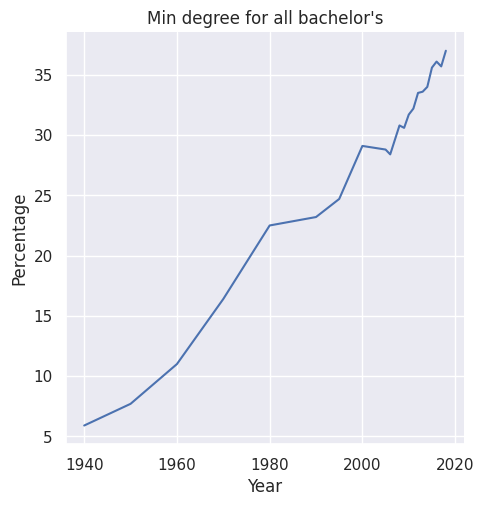

In [7]:
def line_plot_min_degree(data, min_degree):
    '''
    This function returns a graph of the total percentage of the given minimum degree for all sexes throughout the year. 
    '''
    min_data = data.loc[pd.IndexSlice[:,"A",min_degree], ["Total"]]
    graph = sns.relplot(min_data, x="Year", y="Total", kind = 'line')
    graph.set(xlabel = 'Year', ylabel = 'Percentage', title = ('Min degree for all ' + min_degree))
    return graph


ax = line_plot_min_degree(data, "bachelor's").facet_axis(0, 0)
assert [tuple(xy) for xy in ax.get_lines()[0].get_xydata()] == [
    (1940,  5.9), (1950,  7.7), (1960, 11.0), (1970, 16.4), (1980, 22.5), (1990, 23.2),
    (1995, 24.7), (2000, 29.1), (2005, 28.8), (2006, 28.4), (2007, 29.6), (2008, 30.8),
    (2009, 30.6), (2010, 31.7), (2011, 32.2), (2012, 33.5), (2013, 33.6), (2014, 34.0),
    (2015, 35.6), (2016, 36.1), (2017, 35.7), (2018, 37.0),
], "data does not match expected"
assert all(line.get_xydata().size == 0 for line in ax.get_lines()[1:]), "plot has more than 1 line"
assert ax.get_title() == "Min degree for all bachelor's", "title does not match expected"
assert ax.get_xlabel() == "Year", "x-label does not match expected"
assert ax.get_ylabel() == "Percentage", "y-label does not match expected"

## Task: Bar plot for high school min degree percentage by sex in a given year

Write a function `bar_plot_high_school_compare_sex` that takes the educational attainment `data` and a year and returns the result of calling `sns.catplot` to produce a bar plot. The resulting bar plot should compare the total percentages of `Sex` `A`, `M`, and `F` with `high school` `Min degree` in the given year. Label the x-axis "Sex", the y-axis "Percentage", and title the plot "High school completion in 2009" (if using 2009 as the year).

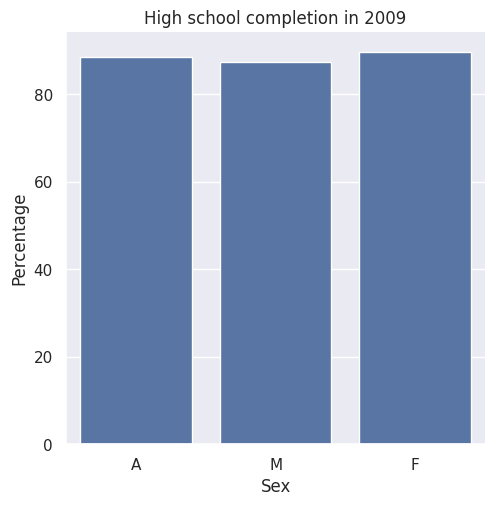

In [8]:
def bar_plot_high_school_compare_sex(data, year):
    '''
    Returns a bar graph of the percentage of each sex who completed High School in the given year.
    '''
    min_data = data.loc[pd.IndexSlice[year,:,"high school"], ["Total"]]
    graph = sns.catplot(min_data, x="Sex", y="Total", kind = 'bar')
    graph.set(xlabel = 'Sex', ylabel = 'Percentage', title = ('High school completion in ' + str(year)))
    return graph


ax = bar_plot_high_school_compare_sex(data, 2009).facet_axis(0, 0)
assert sorted(rectangle.get_height() for rectangle in ax.findobj(Rectangle)[:3]) == [
    87.5, 88.6, 89.8,
], "data does not match expected"
assert len(ax.findobj(Rectangle)) == 4, "too many rectangles drawn" # ignore background Rectangle
assert ax.get_title() == "High school completion in 2009", "title does not match expected"
assert ax.get_xlabel() == "Sex", "x-label does not match expected"
assert ax.get_ylabel() == "Percentage", "y-label does not match expected"

## Writeup: Bar plot versus scatter plot

1. Read Kieran Hiely's comparison of bar plot versus scatter plot from *Data Visualization* section 1.6: [Problems of honesty and good judgment](https://socviz.co/lookatdata.html#problems-of-honesty-and-good-judgment).
1. Compare your bar plot for high school completion in 2009 to the scatter plot below.
1. Answer the question: **Which plot do you prefer and why?**

**Answer**: I believe that both plots serve their own purpose. For instance, the bar graph can be used to show an accurate snapshot of the ratio for high school completers. The Scatter plot can be used to emphasize the difference in each sex's completion, however the scale should be emphasized either through a caption or an explanation. I prefer the bar graph, as it is clear, and avoids misinterpretation. 

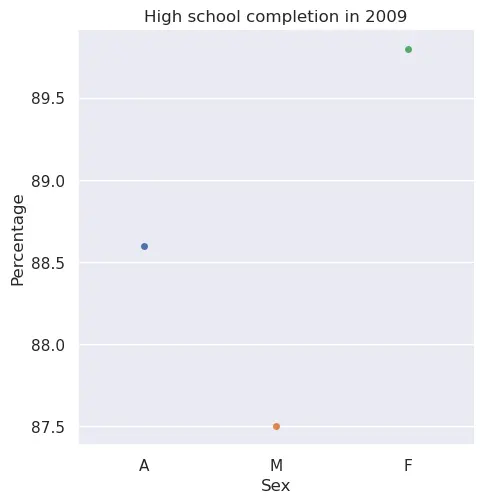

## Task: Plot for min degree percentage over time for a given racial category

Write a function `plot_race_compare_min_degree` that takes the educational attainment `data` and a string category and returns the result of calling the `sns` plotting function that best visualizes this data. The resulting plot should compare each of the 4 `Min degree` options, indicating the percentage of educational attainment for the given racial category, sex `A`, and given `Min degree` over the entire time range of available data. Due to missing data, not all min degree options will stretch the entire width of the plot. Label the x-axis "Year", the y-axis "Percentage", and title the plot "Min degree for Hispanic" (if using Hispanic as the racial category).

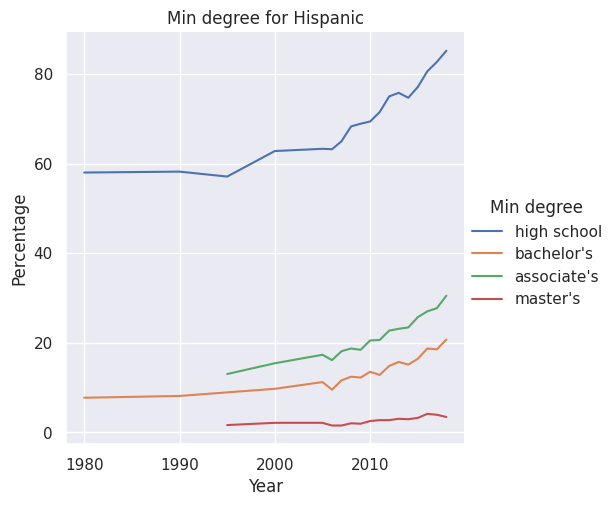

In [9]:
def plot_race_compare_min_degree(data, category):
     '''
     Given a racial category, this function will plot the race's percentage of each minimum degree over time.
     '''

     min_data = data.loc[pd.IndexSlice[:,"A",:], [category]]
     graph = sns.relplot(min_data, x="Year", y=category, kind = 'line', hue="Min degree")
     graph.set(xlabel = 'Year', ylabel = 'Percentage', title = ('Min degree for ' + category))
     return graph


ax = plot_race_compare_min_degree(data, "Hispanic").facet_axis(0, 0)
assert sorted([tuple(xy) for xy in line.get_xydata()] for line in ax.get_lines()[:4]) == [
    [(1980,  7.7), (1990,  8.1), (1995,  8.9), (2000,  9.7), (2005, 11.2), (2006,  9.5),
     (2007, 11.6), (2008, 12.4), (2009, 12.2), (2010, 13.5), (2011, 12.8), (2012, 14.8),
     (2013, 15.7), (2014, 15.1), (2015, 16.4), (2016, 18.7), (2017, 18.5), (2018, 20.7)],
    [(1980, 58.0), (1990, 58.2), (1995, 57.1), (2000, 62.8), (2005, 63.3), (2006, 63.2),
     (2007, 65.0), (2008, 68.3), (2009, 68.9), (2010, 69.4), (2011, 71.5), (2012, 75.0),
     (2013, 75.8), (2014, 74.7), (2015, 77.1), (2016, 80.6), (2017, 82.7), (2018, 85.2)],
    [                            (1995,  1.6), (2000,  2.1), (2005,  2.1), (2006,  1.5),
     (2007,  1.5), (2008,  2.0), (2009,  1.9), (2010,  2.5), (2011,  2.7), (2012,  2.7),
     (2013,  3.0), (2014,  2.9), (2015,  3.2), (2016,  4.1), (2017,  3.9), (2018,  3.4)],
    [                            (1995, 13.0), (2000, 15.4), (2005, 17.3), (2006, 16.1),
     (2007, 18.1), (2008, 18.7), (2009, 18.4), (2010, 20.5), (2011, 20.6), (2012, 22.7),
     (2013, 23.1), (2014, 23.4), (2015, 25.7), (2016, 27.0), (2017, 27.7), (2018, 30.5)],
], "data does not match expected"
assert all(line.get_xydata().size == 0 for line in ax.get_lines()[4:]), "plot has more than 4 lines"
assert ax.get_title() == "Min degree for Hispanic", "title does not match expected"
assert ax.get_xlabel() == "Year", "x-label does not match expected"
assert ax.get_ylabel() == "Percentage", "y-label does not match expected"

## Task: Line plot comparing educational attainment by race over time

Write a function `line_plot_compare_race` that takes the educational attainment `data` and a min degree and returns the result of calling `sns.relplot` to produce a line plot comparing educational attainment for the given `Min degree` across all races (excluding `Total` and `Two or more races`) for sex `A` beginning in the year 2009. The x-axis should have label "Year", the y-axis "Percentage", and the plot title should be "Attainment by race for all associate's" (if using associate's as the min degree).

The way we've learned to create plots in seaborn assumes long-form data where each column represents a different variable, so all our prior tasks have produced plots that only look at a single race (or `Total`). To create a line plot where each column gets its own line, we can simply leave the parameters `x`, `y`, and `hue` unspecified, such as in:

```py
sns.relplot(data, kind="line")
```

If you run into a `TypeError: Invalid object type` while plotting the wide-form data, that's seaborn's way of letting you know it doesn't know how to plot a `MultiIndex` with more than one level as the x-axis. Call `droplevel` with a list of level name(s) to remove the given level(s).

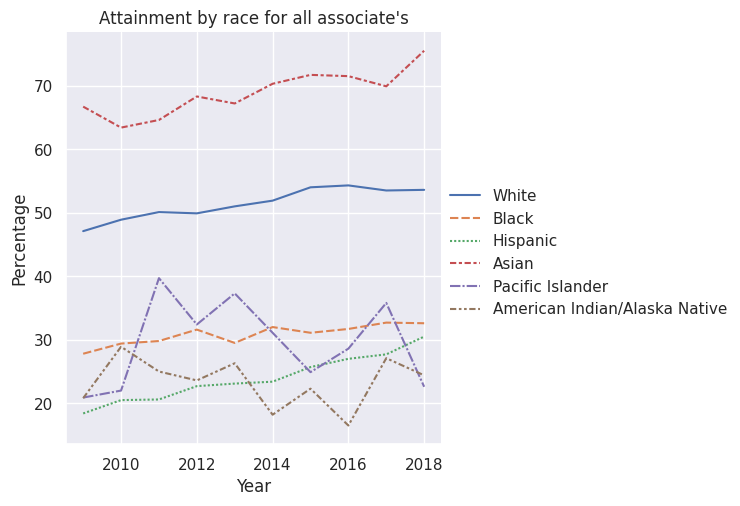

In [12]:
def line_plot_compare_race(data, min_degree):
    '''
    Returns a graph of the history of the percentage of college attainment of the specified minimum degree for each race. 
    '''
    min_data = data.loc[pd.IndexSlice[2009:,"A", min_degree], "White" : "American Indian/Alaska Native"]
    min_data = min_data.droplevel(["Sex", "Min degree"])
    graph = sns.relplot(min_data, kind = 'line')
    graph.set(xlabel = 'Year', ylabel = 'Percentage', title = ('Attainment by race for all ' + min_degree))
    return graph


ax = line_plot_compare_race(data, "associate's").facet_axis(0, 0)
assert sorted([tuple(xy) for xy in line.get_xydata()] for line in ax.get_lines()[:6]) == [
    [(2009, 18.4), (2010, 20.5), (2011, 20.6), (2012, 22.7), (2013, 23.1),
     (2014, 23.4), (2015, 25.7), (2016, 27.0), (2017, 27.7), (2018, 30.5)],
    [(2009, 20.8), (2010, 28.9), (2011, 25.0), (2012, 23.6), (2013, 26.3),
     (2014, 18.2), (2015, 22.3), (2016, 16.5), (2017, 27.1), (2018, 24.4)],
    [(2009, 20.9), (2010, 22.0), (2011, 39.7), (2012, 32.4), (2013, 37.3),
                   (2015, 24.9), (2016, 28.6), (2017, 35.8), (2018, 22.6)],
    [(2009, 27.8), (2010, 29.4), (2011, 29.8), (2012, 31.6), (2013, 29.5),
     (2014, 32.0), (2015, 31.1), (2016, 31.7), (2017, 32.7), (2018, 32.6)],
    [(2009, 47.1), (2010, 48.9), (2011, 50.1), (2012, 49.9), (2013, 51.0),
     (2014, 51.9), (2015, 54.0), (2016, 54.3), (2017, 53.5), (2018, 53.6)],
    [(2009, 66.7), (2010, 63.4), (2011, 64.6), (2012, 68.3), (2013, 67.2),
     (2014, 70.3), (2015, 71.7), (2016, 71.5), (2017, 69.9), (2018, 75.5)],
], "data does not match expected"
assert all(line.get_xydata().size == 0 for line in ax.get_lines()[6:]), "plot has more than 6 lines"
assert ax.get_title() == "Attainment by race for all associate's", "title does not match expected"
assert ax.get_xlabel() == "Year", "x-label does not match expected"
assert ax.get_ylabel() == "Percentage", "y-label does not match expected"

## Writeup: Visualizations and persuasive rhetoric

Consider this alternative title for the final programming task: "Asian associate's attainment reaches new heights". For the purpose of producing reports and analyses, data programmers will often find themselves needing to choose the type of plot, carry-out data processing tasks (often overlooked yet critical changes to a dataset), and drawing conclusions from those plots to aid readers in interpreting results.

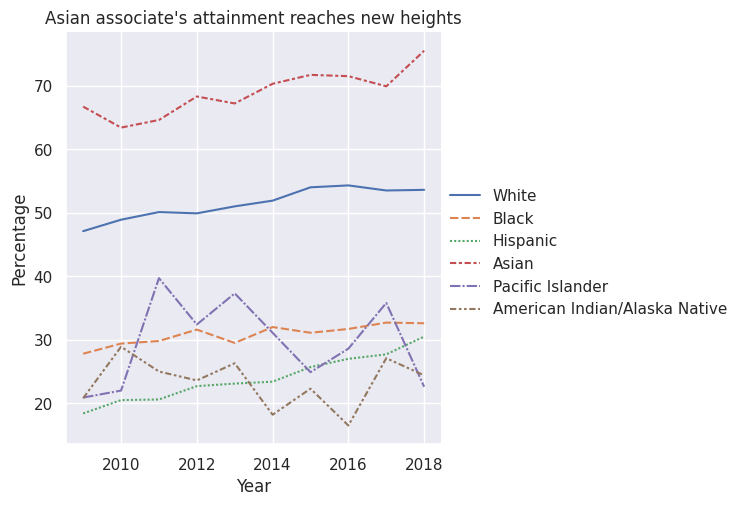

In [11]:
line_plot_compare_race(data, "associate's").set(title="Asian associate's attainment reaches new heights")

Browse the Lumina Foundation's [Educational Attainment](https://strongernation.luminafoundation.org/attainment) data dashboard to identify one or more visualizations that can **explain how this alternative title might suggest a misleading, incomplete, or otherwise harmful conclusion about racial equity in educational attainment.** Describe your explanation and include a link to your selected plot.

**Answer**: This title may be misleading, as it does not paint an accurate picture for all Asians. For example, looking at the Detailed Race/Ethnicity graph for the subpopulation AAPI, we see that although many Asians have a high percentage of degree earners, there are many ethnicities that do not follow the same trend, such as the Bhutanese and the Burmese people. This may overall harm these groups, as equity in education will be hard to attain if they are lumped in with the groups of higher attainment rates. 

 (https://strongernation.luminafoundation.org/attainment?explore=attainmentRaceGender&ageGroup=2564&subpopulation=asian&sortBy=name|asc)

To learn more about the design of the data dashboard, read the write-up by [Darkhorse Analytics](https://www.darkhorseanalytics.com/blog/lumina-foundations-stronger-nation-gets-a-powerful-new-data-experience) and compare it the write-up by the previous team, [Periscopic](https://periscopic.com/#!/impacts/americas-educational-attainment).